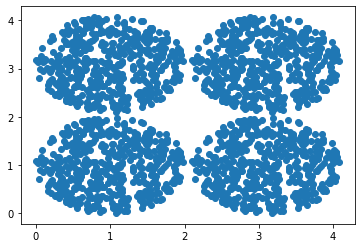

In [5]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import pandas
from scipy.spatial import distance

# Specify numer of clusters to find
k = 4

file_string = "fourCircles.txt"
train_data = pandas.read_csv(file_string, sep=" ", header=None)
train_data.columns = ["x", "y"]

plt.scatter(train_data["x"], train_data["y"])
plt.show()

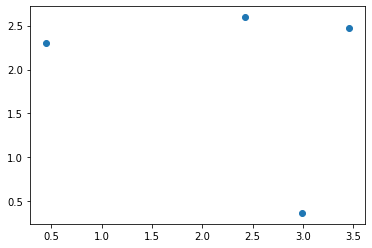

In [6]:
# Identify a seed for consistent results
seed = None # set to none for no seed
# Sample K Random Points
train_data_centroids = train_data.sample(n = k, random_state = seed)

plt.scatter(train_data_centroids["x"], train_data_centroids["y"])
plt.show()

In [7]:
centroids_did_not_change = False

max_iterations = 20
for iteration_index in list(range(0, max_iterations)):
    if (centroids_did_not_change):
        break;

    print("{} / {}".format(iteration_index, max_iterations))
    cluster_group_array = []
    for index, row in train_data.iterrows():
        prev_distance = float("inf")
        cluster_group = None

        cluster_group_index = 0

        for i, centroid_row in train_data_centroids.iterrows():
            euclidean_distance = distance.euclidean(
                [centroid_row["x"], centroid_row["y"]],
                [row["x"], row["y"]]
            )

            if (euclidean_distance < prev_distance):
                cluster_group = cluster_group_index
                prev_distance = euclidean_distance

            cluster_group_index = cluster_group_index + 1

        cluster_group_array.append(cluster_group)

    # This adds the cluster_group, which will be used to filter the data
    train_data = pandas.DataFrame(
        {
            'x': train_data["x"],
            'y': train_data["y"],
            'cluster_group': cluster_group_array
        }
    )

    # Reassign Centroids
    # With help from https://stackoverflow.com/questions/45418353/get-nearest-coordinates-from-pandas-df-from-centroid-of-coordinates
    centroids = []
    for i in list(range(0, k)):
        train_data_grouped_by_cluster = train_data[train_data['cluster_group'] == i]
        # Get row containing centroid
        centroid = train_data_grouped_by_cluster.loc[[train_data_grouped_by_cluster.sub(train_data_grouped_by_cluster.mean()).pow(2).sum(1).idxmin()]]
        centroids.append([
            centroid.iloc[0]["x"],
            centroid.iloc[0]["y"]
        ])

    old_centroids = []
    for index, old_centroid_row in train_data_centroids.iterrows():
        old_centroids.append([
            old_centroid_row["x"],
            old_centroid_row["y"]
        ])

    centroids_euclidean_distance = 0
    for i in list(range(0, len(centroids))):
        centroids_euclidean_distance += distance.euclidean(
            centroids[i],
            old_centroids[i],
        )

    print('δ: centroids_euclidean_distance error')
    print(centroids_euclidean_distance)

    if (centroids_euclidean_distance == 0):
        centroids_did_not_change = True;
    
    train_data_centroids = pandas.DataFrame(
        numpy.array(centroids),
        columns=["x", "y"]
    )

print('Done')

0 / 20
δ: centroids_euclidean_distance error
1.39586671837903
1 / 20
δ: centroids_euclidean_distance error
0.7684407677105931
2 / 20
δ: centroids_euclidean_distance error
0.7951838700977558
3 / 20
δ: centroids_euclidean_distance error
0.9522023077638986
4 / 20
δ: centroids_euclidean_distance error
0.9197737544602598
5 / 20
δ: centroids_euclidean_distance error
0.49093675163934314
6 / 20
δ: centroids_euclidean_distance error
0.12933254648854692
7 / 20
δ: centroids_euclidean_distance error
0.0
Done


Cluster 0
mean point
x    3.086406
y    0.982919
Name: 0, dtype: float64
size of cluster
500
Cluster 1
mean point
x    0.986406
y    0.982919
Name: 1, dtype: float64
size of cluster
500
Cluster 2
mean point
x    0.986406
y    3.082919
Name: 2, dtype: float64
size of cluster
500
Cluster 3
mean point
x    3.086406
y    3.082919
Name: 3, dtype: float64
size of cluster
500


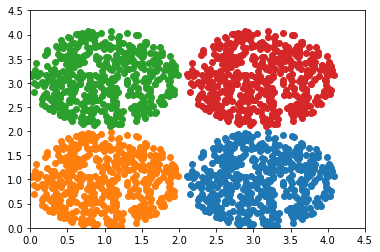

In [8]:
# Remove the following line for a readable output
pandas.set_option('display.max_rows', None)

# Print final grouping
plt.xlim(0, 4.5)
plt.ylim(0, 4.5)

for i in list(range(0, k)):
    print("Cluster {}".format(i))
#     print(train_data[train_data['cluster_group'] == i])

    print('mean point')
    mean_point = train_data_centroids.iloc[i]
    print(mean_point)
    
    cluster_data = train_data[train_data['cluster_group'] == i]
    print('size of cluster')
    print(cluster_data.shape[0])
    
    plt.scatter(cluster_data["x"], cluster_data["y"])

plt.show()